please convert this path to whatever exists on your local!!

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/nour/project 1 - ADS/data/cleaned_dataframe_project1.csv')
df.head(5)

,Unnamed: 0,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,cleaned_tokens
0,0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...","['new', 'socrates', 'make', 'leave', 'usual', ..."
1,1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...,"['surely', 'prosecuting', 'anyone', 'king', 'a..."
2,2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...,"['athenians', 'prosecution', 'indictment', 'eu..."
3,3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?,[]
4,4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ...","['someone', 'indicted', 'going', 'indicted', '..."


let's find the dates of existence for each school

In [2]:
##here we find the starting dates of each school
df.groupby(['school'])['original_publication_date'].min()

school
analytic           1910
aristotle          -320
capitalism         1776
communism          1848
continental        1961
empiricism         1689
feminism           1792
german_idealism    1781
nietzsche          1886
phenomenology      1907
plato              -350
rationalism        1637
stoicism            125
Name: original_publication_date, dtype: int64

In [3]:
##here we find the ending dates of each school
df.groupby(['school'])['original_publication_date'].max()

school
analytic           1985
aristotle          -320
capitalism         1936
communism          1883
continental        1972
empiricism         1779
feminism           1981
german_idealism    1820
nietzsche          1888
phenomenology      1950
plato              -350
rationalism        1710
stoicism            170
Name: original_publication_date, dtype: int64

Which means, the schools in order of existence are:
plato              -350 - 350
aristotle          -320 - 320
stoicism            125 - 170
rationalism        1637 - 1710
empiricism         1689 - 1779
capitalism         1776 - 1936
german_idealism    1781 - 1820
feminism           1792 - 1981
communism          1848 - 1883
nietzsche          1886 - 1888
phenomenology      1907 - 1950
analytic           1910 - 1985
continental        1961 - 1972



In [4]:
##how many authors in each school?
df.groupby(['school'])['author'].nunique()

school
analytic           7
aristotle          1
capitalism         3
communism          2
continental        3
empiricism         3
feminism           3
german_idealism    3
nietzsche          1
phenomenology      3
plato              1
rationalism        4
stoicism           2
Name: author, dtype: int64

Please note I used Excel to generate a graph for schools vs number of authors

In [5]:
##when did each of the authors contribute to the schools? -- starting dates first!
df.groupby(['school', 'author'])['original_publication_date'].min()

school           author         
analytic         Kripke             1972
                 Lewis              1985
                 Moore              1910
                 Popper             1959
                 Quine              1950
                 Russell            1912
                 Wittgenstein       1921
aristotle        Aristotle          -320
capitalism       Keynes             1936
                 Ricardo            1817
                 Smith              1776
communism        Lenin              1862
                 Marx               1848
continental      Deleuze            1968
                 Derrida            1967
                 Foucault           1961
empiricism       Berkeley           1710
                 Hume               1739
                 Locke              1689
feminism         Beauvoir           1949
                 Davis              1981
                 Wollstonecraft     1792
german_idealism  Fichte             1798
                 Hegel  

In [6]:
##when did each of the authors finish contributing to the schools?
df.groupby(['school', 'author'])['original_publication_date'].max()

school           author         
analytic         Kripke             1975
                 Lewis              1985
                 Moore              1910
                 Popper             1959
                 Quine              1950
                 Russell            1921
                 Wittgenstein       1953
aristotle        Aristotle          -320
capitalism       Keynes             1936
                 Ricardo            1817
                 Smith              1776
communism        Lenin              1862
                 Marx               1883
continental      Deleuze            1972
                 Derrida            1967
                 Foucault           1966
empiricism       Berkeley           1713
                 Hume               1779
                 Locke              1689
feminism         Beauvoir           1949
                 Davis              1981
                 Wollstonecraft     1792
german_idealism  Fichte             1798
                 Hegel  

let's look at the most common phrases of each school using wordclouds

In [ ]:
import ast
import json
df['cleaned_tokens'] = df['cleaned_tokens'].apply(lambda x: ast.literal_eval(x))

In [21]:
import numpy as np
schools_grouped = df.groupby('school')['cleaned_tokens'].agg(list)
schools_grouped

school
analytic           [[book, grown, attempt, harmonize, different, ...
aristotle          [[name, common, definition, corresponds, name,...
capitalism         [[annual, labour, nation, fund, originally, su...
communism          [[wealth, societies, capitalist, mode, product...
continental        [[us, human, body, defines, natural, right, sp...
empiricism         [[reader, hast, beginning, end, discourse, con...
feminism           [[read, great, pleasure, pamphlet, lately, pub...
german_idealism    [[critique, titled, critique, pure, practical,...
nietzsche          [[book, belongs, rare, men], [perhaps, alive],...
phenomenology      [[phenomenology], [seem, strange, question, st...
plato              [[new, socrates, make, leave, usual, haunts, l...
rationalism        [[self, caused, mean, essence, involves, exist...
stoicism           [[within, power, beyond, power], [within, powe...
Name: cleaned_tokens, dtype: object

In [23]:
df1 = pd.DataFrame(schools_grouped)
df1['cleaned_tokens'] = df1['cleaned_tokens'].apply(lambda x: list(np.concatenate(x).flat))

analytic


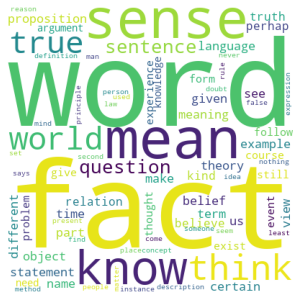

aristotle


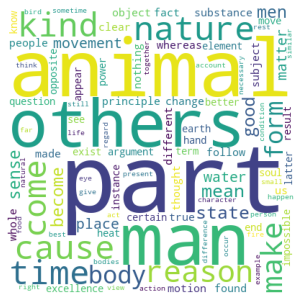

capitalism


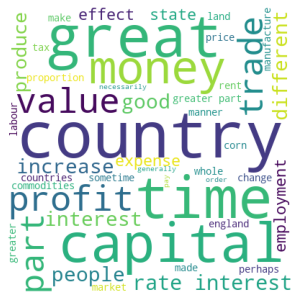

communism


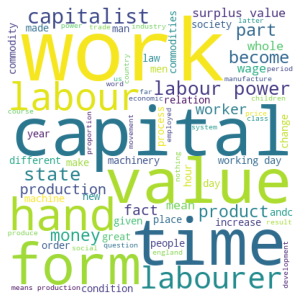

continental


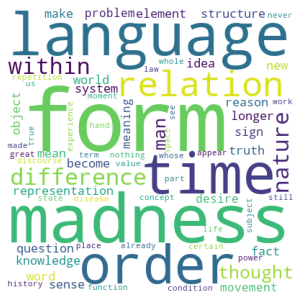

empiricism


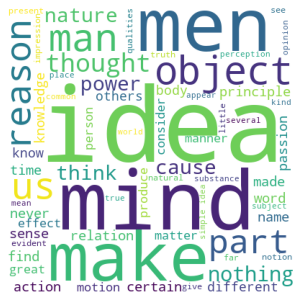

feminism


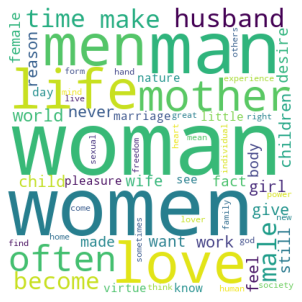

german_idealism


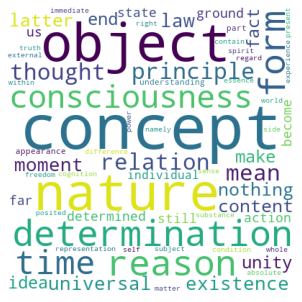

nietzsche


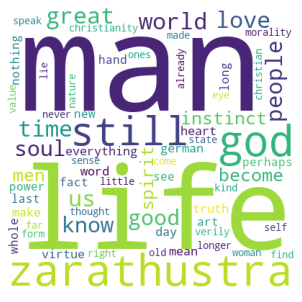

phenomenology


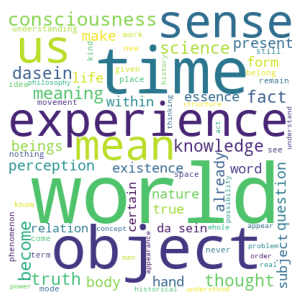

plato


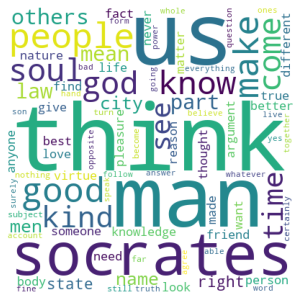

rationalism


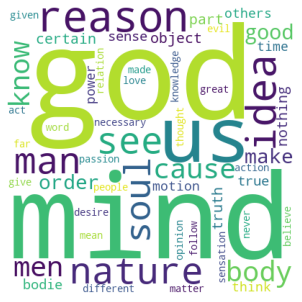

stoicism


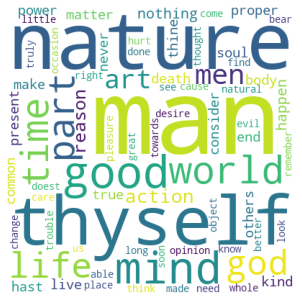

In [25]:

for i in range(len(['analytic', 'aristotle', 'capitalism', 'communism', 'continental',
       'empiricism', 'feminism', 'german_idealism', 'nietzsche',
       'phenomenology', 'plato', 'rationalism', 'stoicism'])):
    print(['analytic', 'aristotle', 'capitalism', 'communism', 'continental',
       'empiricism', 'feminism', 'german_idealism', 'nietzsche',
       'phenomenology', 'plato', 'rationalism', 'stoicism'][i])
    wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df1['cleaned_tokens'][i]))
 
    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()